In [166]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# EDA

In [167]:
#Importing dataset
df = pd.read_csv("Foreign_Exchange_Rates.csv")

In [168]:
df.head()

,Unnamed: 0,Country/Currency,currency,value,date
0,0,Australia Dollar,AUD,1.581627,17-12-2021
1,1,Great Britain Pound,GBP,0.851619,17-12-2021
2,2,Euro,EUR,1.000000,17-12-2021
3,3,Japan Yen,JPY,128.301759,17-12-2021
4,4,Switzerland Franc,CHF,1.041015,17-12-2021


In [169]:
df_INR = df.loc[df.currency == 'INR']
df_INR.head()

,Unnamed: 0,Country/Currency,currency,value,date
67,67,India Rupee,INR,86.052225,17-12-2021
217,217,India Rupee,INR,85.424708,18-12-2021
367,367,India Rupee,INR,85.424708,19-12-2021
517,517,India Rupee,INR,85.497443,20-12-2021
667,667,India Rupee,INR,85.525694,21-12-2021


In [170]:
df.columns

Index(['Unnamed: 0', 'Country/Currency', 'currency', 'value', 'date'], dtype='object')

In [171]:
# Let's remove the unwanted first column
df_INR = df_INR.drop(columns=df_INR.columns[0])

In [172]:
df_INR.dtypes

Country/Currency     object
currency             object
value               float64
date                 object
dtype: object

In [173]:
# converting date to datetime64[ns] type
df_INR['date'] = pd.to_datetime(df_INR['date'], format='%d-%m-%Y', dayfirst=True)

In [174]:
#Find the duplicates
df_INR.duplicated().sum()

0

In [175]:
# As we are calculating for INR we don't need Country/Currency and currency column
df_INR = df_INR.drop(columns=df_INR.columns[:2])

In [176]:
df_INR.head()

,value,date
67,86.052225,2021-12-17
217,85.424708,2021-12-18
367,85.424708,2021-12-19
517,85.497443,2021-12-20
667,85.525694,2021-12-21


In [177]:
# We can get date month and year part from the date column
df_INR['month'] = df_INR['date'].dt.month
df_INR['year'] = df_INR['date'].dt.year
df_INR['day'] = df_INR['date'].dt.day

In [178]:
df_INR.head()

,value,date,month,year,day
67,86.052225,2021-12-17,12,2021,17
217,85.424708,2021-12-18,12,2021,18
367,85.424708,2021-12-19,12,2021,19
517,85.497443,2021-12-20,12,2021,20
667,85.525694,2021-12-21,12,2021,21


In [179]:
# Now we can free the date column from the dataset
df_INR = df_INR.drop(columns=df_INR.columns[1])

In [180]:
df_INR.columns

Index(['value', 'month', 'year', 'day'], dtype='object')

# ADF Test

In [181]:
# check for Stationarity - ADF Test
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_INR['value'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.3001940814468083
p-value: 0.17190538402702799
Critial Values:
   1%, -3.450951662384033
Critial Values:
   5%, -2.8706147570800784
Critial Values:
   10%, -2.571604931640625


In [182]:
"""
From ADF test, it's observed that, data is not stationary. 
We can see p-value is 17% (usually it must be less than 0.05 or 5%), 
and ADF-stat value is greater than all the critical values. 

Both these values confirms the data to be Non-Stationary
"""

"\nFrom ADF test, it's observed that, data is not stationary. \nWe can see p-value is 17% (usually it must be less than 0.05 or 5%), \nand ADF-stat value is greater than all the critical values. \n\nBoth these values confirms the data to be Non-Stationary\n"

In [183]:
X = df_INR.iloc[:, 1:].values
y = df_INR.iloc[:, 0].values

In [184]:
X.shape

(321, 3)

In [185]:
y.shape

(321,)

In [186]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Linear Regression

In [187]:
# Fitting Linear Regression in dataset
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [188]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.7425229758509726


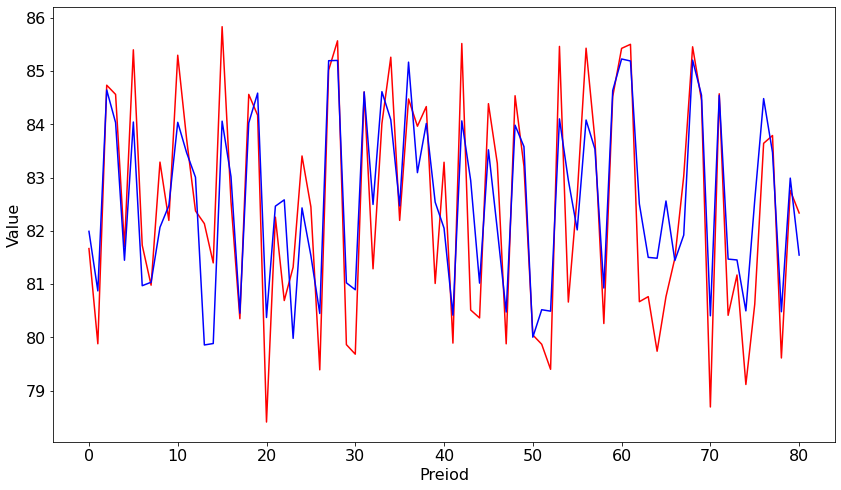

In [189]:
plt.plot(y_test, color="r")
plt.plot(y_pred, color="b")
plt.xlabel("Preiod")
plt.ylabel("Value")
plt.show()

# Polynomial Regression

In [190]:
# Fitting Polynomial Regression in dataset
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_trans, y_train)
y_pred = lr.predict(X_test_trans)

In [191]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.7508885560692417


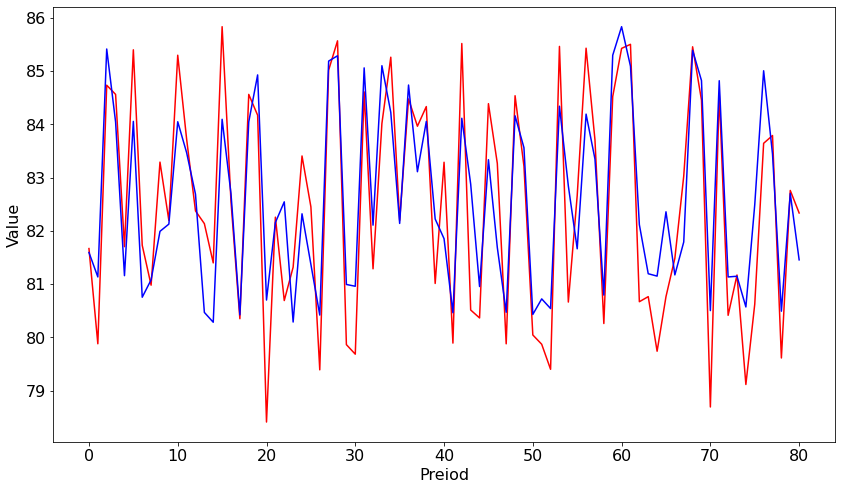

In [192]:
plt.plot(y_test, color="r")
plt.plot(y_pred, color="b")
plt.xlabel("Preiod")
plt.ylabel("Value")
plt.show()

# LSTM

In [193]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))

In [204]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# define model
model = Sequential()
model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(1, 3)))
model.add(LSTM(128))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 1, 256)            266240    
                                                                 
 lstm_10 (LSTM)              (None, 128)               197120    
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 463,489
Trainable params: 463,489
Non-trainable params: 0
_________________________________________________________________


In [208]:
# fit model
X_train = np.reshape(X_train, (X_train.shape[0], 1, 3))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 3))
history = model.fit(X_train, y_train, epochs=25, batch_size=8, verbose=1, validation_split=0.1)

Epoch 1/25
27/27 [==============================] - 0s 13ms/step - loss: 0.2080 - val_loss: 0.2254
Epoch 2/25
27/27 [==============================] - 0s 9ms/step - loss: 0.1999 - val_loss: 0.2335
Epoch 3/25
27/27 [==============================] - 0s 9ms/step - loss: 0.2019 - val_loss: 0.2292
Epoch 4/25
27/27 [==============================] - 0s 9ms/step - loss: 0.2008 - val_loss: 0.2378
Epoch 5/25
27/27 [==============================] - 0s 9ms/step - loss: 0.2015 - val_loss: 0.2293
Epoch 6/25
27/27 [==============================] - 0s 9ms/step - loss: 0.1958 - val_loss: 0.2181
Epoch 7/25
27/27 [==============================] - 0s 9ms/step - loss: 0.2012 - val_loss: 0.2254
Epoch 8/25
27/27 [==============================] - 0s 9ms/step - loss: 0.1997 - val_loss: 0.2269
Epoch 9/25
27/27 [==============================] - 0s 9ms/step - loss: 0.1959 - val_loss: 0.2222
Epoch 10/25
27/27 [==============================] - 0s 9ms/step - loss: 0.1937 - val_loss: 0.2236
Epoch 11/25
27/27 

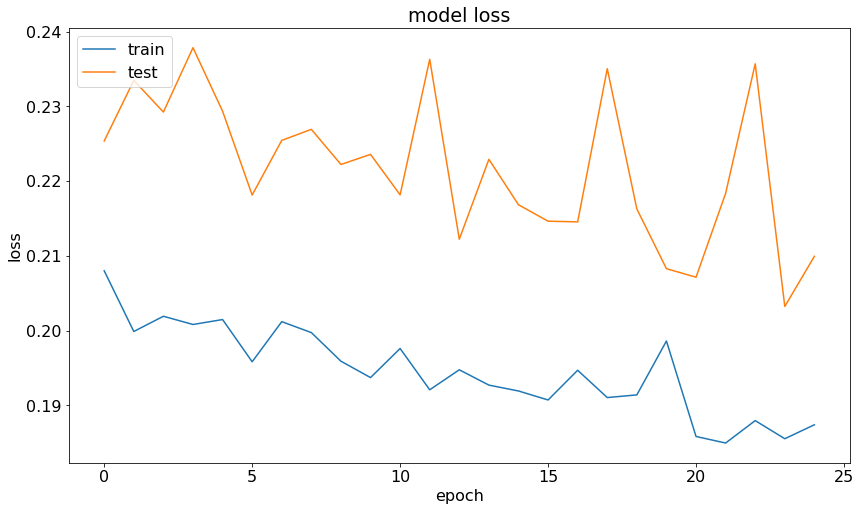

In [209]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [214]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
test_predict = sc_y.inverse_transform(test_predict)

print('Shape of train and test predict: ', train_predict.shape, test_predict.shape)

3/3 [==============================] - 0s 4ms/step
Shape of train and test predict:  (240, 1) (81, 1)


In [215]:
# root mean squared error or rmse
import math
from sklearn.metrics import mean_squared_error

def measure_rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

train_score = measure_rmse(y_train, train_predict)
test_score = measure_rmse(y_test, test_predict)

print('Train and Test RMSE: ', train_score, test_score)

Train and Test RMSE:  0.42236493969161854 0.9732142171853871


In [216]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.7508885560692417


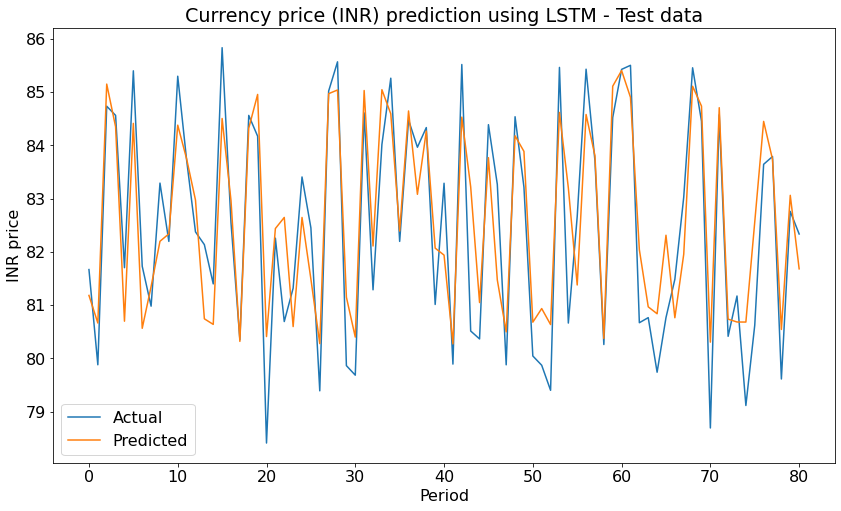

In [218]:
plt.rc("figure", figsize=(14, 8))
plt.rcParams.update({'font.size': 16})
plt.plot(y_test, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.xlabel('Period')
plt.ylabel('INR price')
plt.title('Currency price (INR) prediction using LSTM - Test data')
plt.legend()
plt.show()